In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/WBCD_Dataset/breast_cancer.csv")

# Description of the Data

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Id column is redundant and not useful, so dropping the ID column
dataset.drop('id',axis =1,inplace=True)

In [5]:
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Checking the total shape of the dataset
dataset.shape

(569, 31)

The WBCD dataset, which we are using has 31 columns (excluding ID column)  and 569 records.

In [7]:
# Reviewing the Data type information of the columns of WBCD dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

From the above information, it is clear that all the columns have values of datatype float, except diagnosis. Since, there may be possibility of missing values in the dataset.

In [8]:
# Checking missing variables in the dataset
dataset.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [9]:
dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

So, it is clear that diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant or Benign). The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.

# Analyzing Multicollinearity

Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many summary measurements.

In [10]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
dataset.skew() # The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

<ipython-input-11-0b88fdeecb48>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew() # The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [12]:
# Group by diagnosis and review the output.
diag_gr = dataset.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


357 observations indicating the absence of cancer cells and 212 show absence of cancer cell.

<ipython-input-13-36bc77dcfad8>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(dataset.corr(), dtype=np.bool)
<ipython-input-13-36bc77dcfad8>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataset.corr(), dtype=np.bool)
<ipython-input-13-36bc77dcfad8>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silen

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

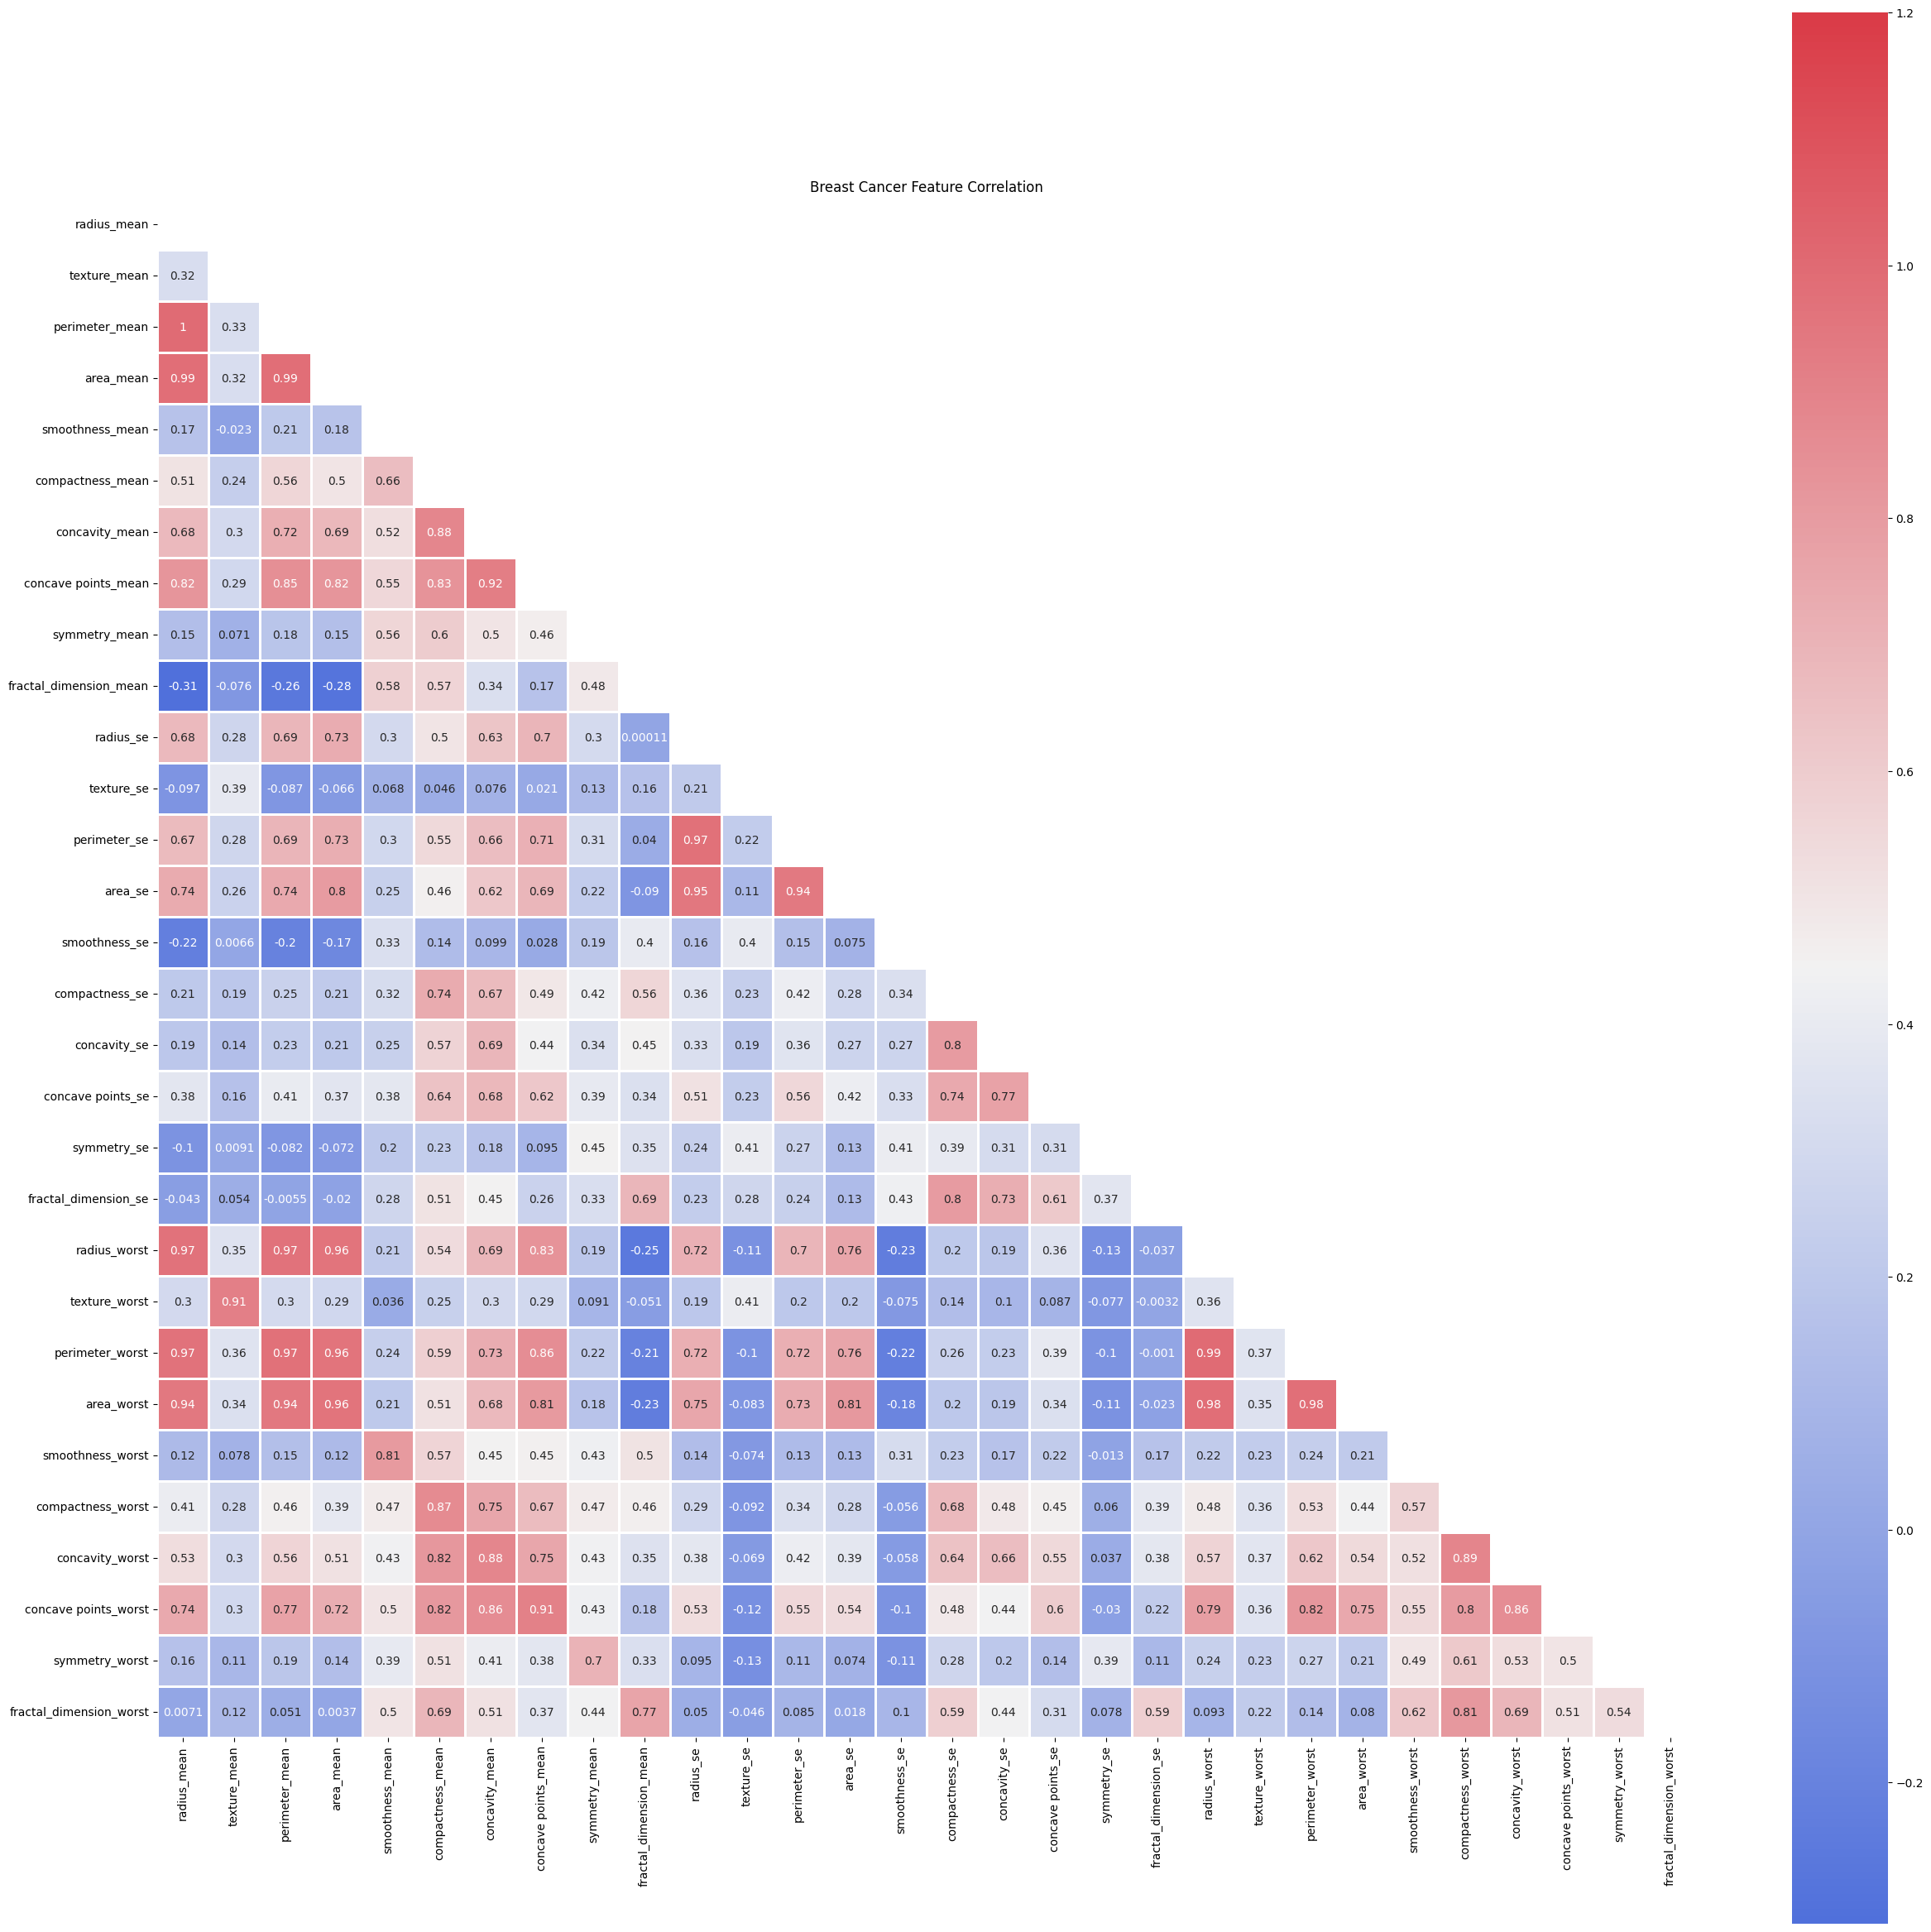

In [13]:
# Checking Multicollinearity

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(30, 30))
plt.title('Breast Cancer Feature Correlation')

# Generate a mask for the upper triangle
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(dataset.corr(), vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

There are quite a few variables that are correlated. Often we have features that are highly correlated and those provide redundant information. By eliminating highly correlated features we can avoid a predictive bias for the information contained in these features. This also shows us, that when we want to make statements about the biological/ medical importance of specific features, we need to keep in mind that just because they are suitable to predicting an outcome they are not necessarily causal - they could simply be correlated with causal factors.

I am now removing all features with a correlation higher than 0.9, keeping the feature with the lower mean.

In [14]:
dataset = dataset.drop(["compactness_mean","concavity_mean","texture_worst","fractal_dimension_se","texture_mean","perimeter_worst","texture_se","perimeter_se","radius_mean"],axis=1)

In [15]:
dataset

,diagnosis,perimeter_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,area_se,smoothness_se,...,concave points_se,symmetry_se,radius_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,122.80,1001.0,0.11840,0.14710,0.2419,0.07871,1.0950,153.40,0.006399,...,0.01587,0.03003,25.380,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,132.90,1326.0,0.08474,0.07017,0.1812,0.05667,0.5435,74.08,0.005225,...,0.01340,0.01389,24.990,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,130.00,1203.0,0.10960,0.12790,0.2069,0.05999,0.7456,94.03,0.006150,...,0.02058,0.02250,23.570,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,77.58,386.1,0.14250,0.10520,0.2597,0.09744,0.4956,27.23,0.009110,...,0.01867,0.05963,14.910,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,135.10,1297.0,0.10030,0.10430,0.1809,0.05883,0.7572,94.44,0.011490,...,0.01885,0.01756,22.540,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,142.00,1479.0,0.11100,0.13890,0.1726,0.05623,1.1760,158.70,0.010300,...,0.02454,0.01114,25.450,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,131.20,1261.0,0.09780,0.09791,0.1752,0.05533,0.7655,99.04,0.005769,...,0.01678,0.01898,23.690,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,108.30,858.1,0.08455,0.05302,0.1590,0.05648,0.4564,48.55,0.005903,...,0.01557,0.01318,18.980,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,140.10,1265.0,0.11780,0.15200,0.2397,0.07016,0.7260,86.22,0.006522,...,0.01664,0.02324,25.740,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Visualizing the data using Plots

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that you can use to understand each attribute of your dataset independently.

* Histograms.
* Density Plots.
* Box and Whisker Plots.

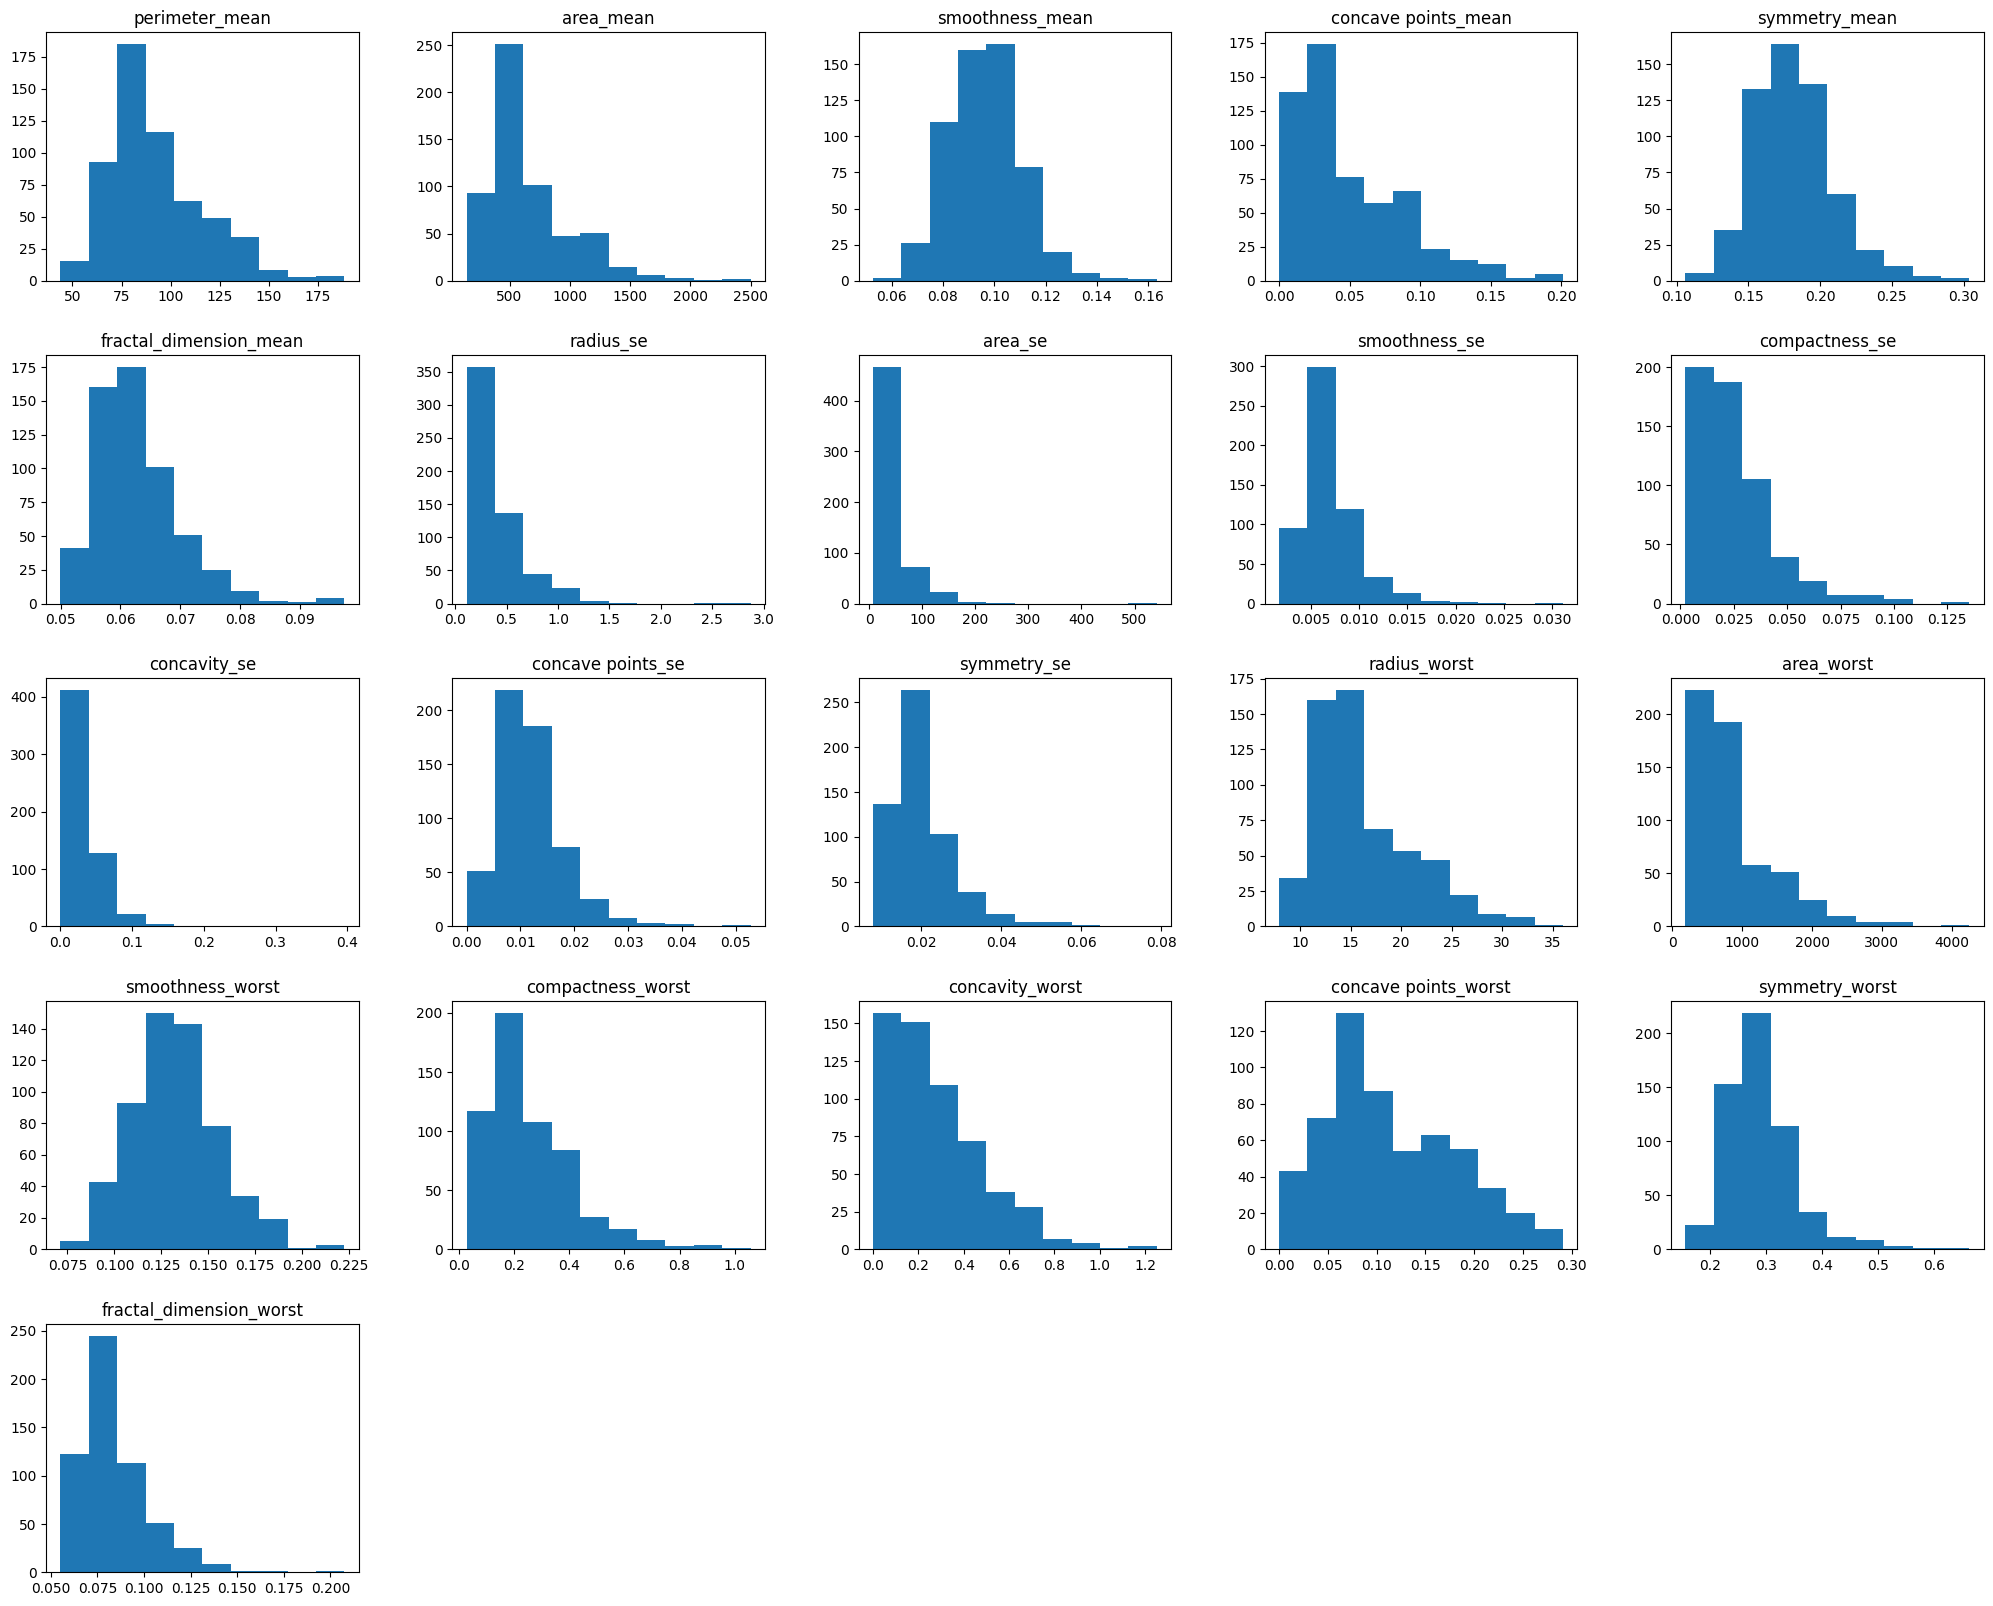

In [16]:
hist_mean = dataset.hist(bins=10, figsize=(25, 20), grid=False,)

We can see that perhaps the attributes concavity, and concavity_point may have an exponential distribution. We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

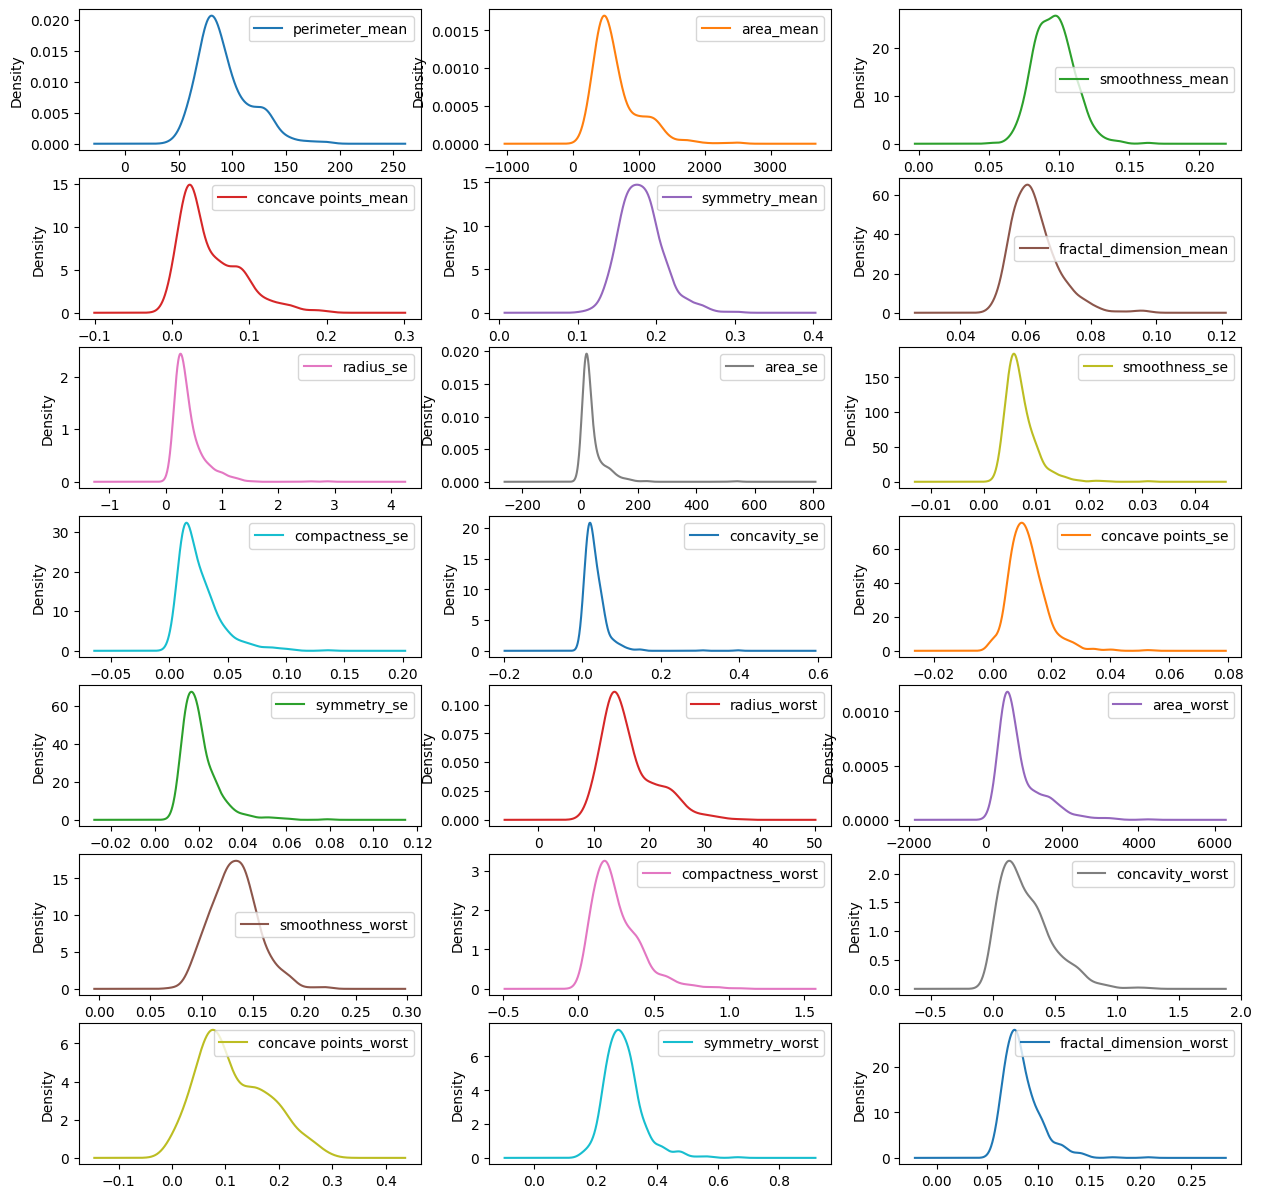

In [17]:
plt = dataset.plot(kind= 'density', subplots=True, layout=(7,3), sharex=False, 
                     sharey=False,fontsize=10, figsize=(15,15))

We can see that perhaps the attributes perimeter, radius, area, concavity,compactness may have an exponential distribution. We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.



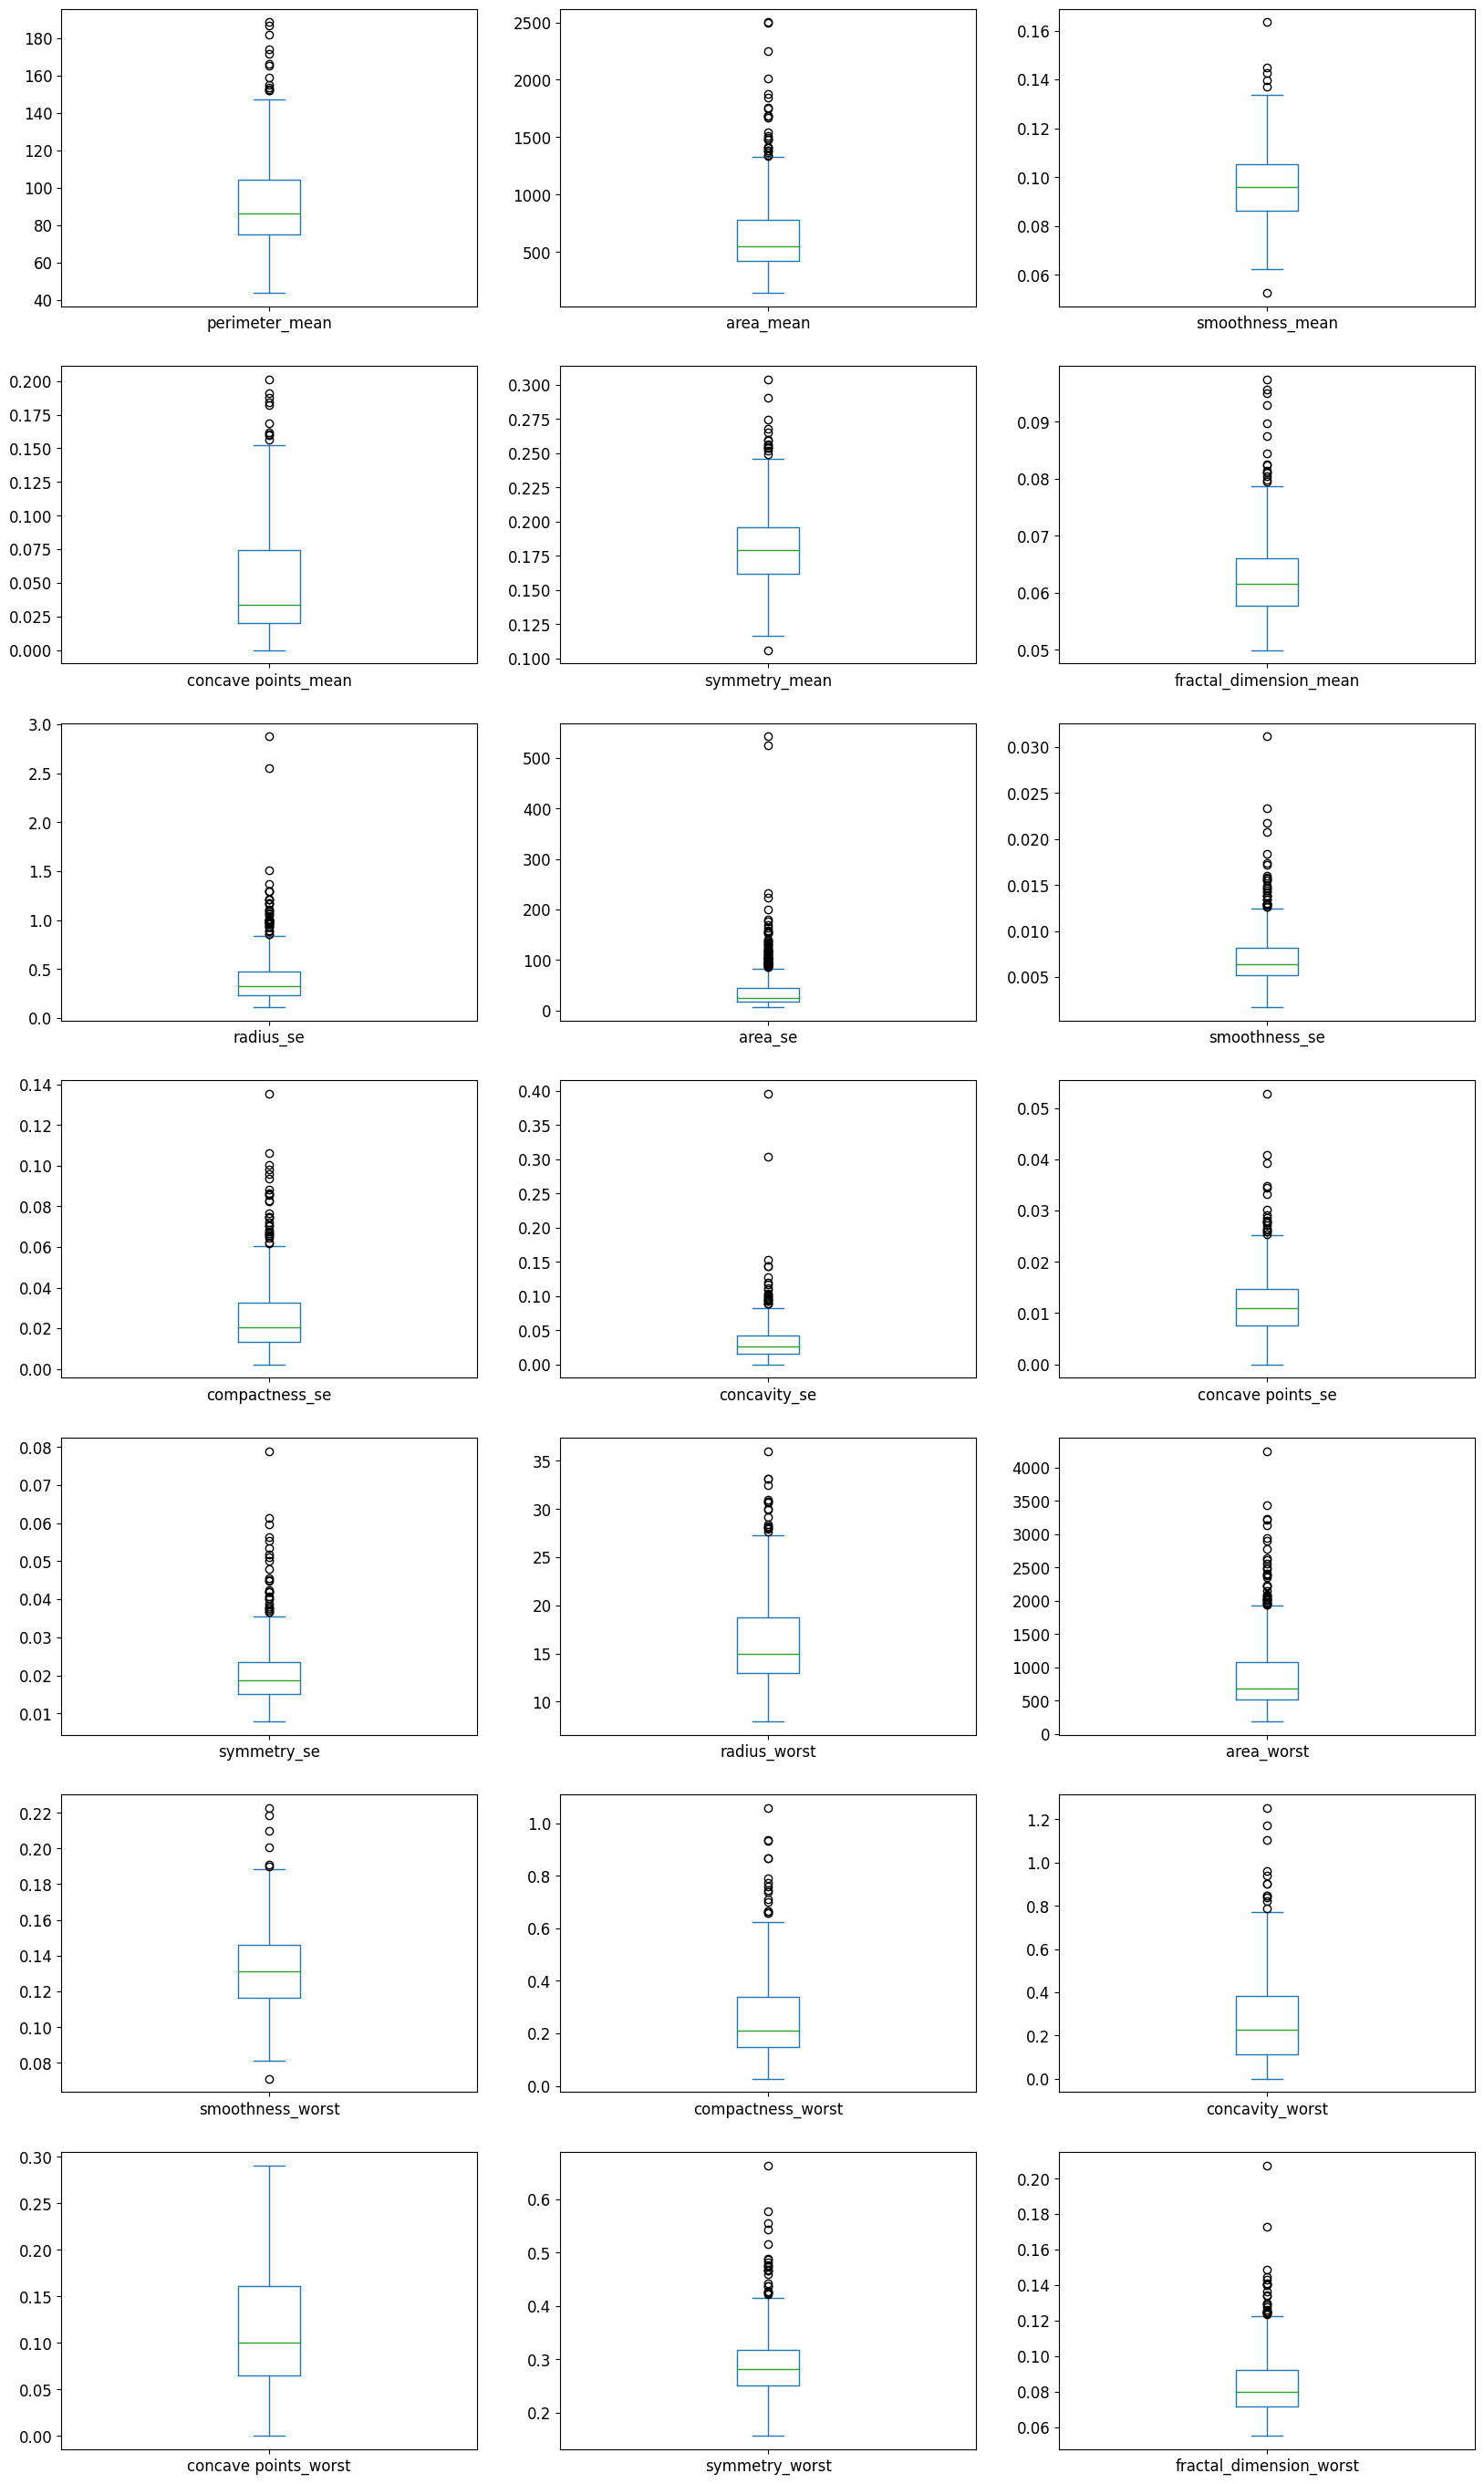

In [18]:
plt = dataset.plot(kind= 'box', subplots=True, layout=(10,3), sharex=False, sharey=False, fontsize=12, figsize=(20,50))

We can see that perhaps the attributes perimeter, radius, area, concavity,compactness may have an exponential distribution. We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

# Data Label Encoding

The Processof converting categorical data into numerical data is Encoding. Since the dataset has one column named 'diagnosis', which has categorical values, we will convert those values into numeral form of 0 and 1.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   perimeter_mean           569 non-null    float64
 2   area_mean                569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  radius_worst             5

In [20]:
#Assign predictors to a variable of ndarray (matrix) type
array = dataset.values
X = array[:,1:21] # features
Y = array[:,0]

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [22]:
#transform the class labels from their original string representation (M and B) into integers
Y = LabelEncoder().fit_transform(Y)

# Data Scaling - Normalization

In [23]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler=StandardScaler()
X = scaler.fit_transform(X)

Now, we have X containg all input features from 1 to 21 and Y as the output feature. The values of X are normalized and Y are in numerical data type. Now the dataset (X,Y) is clean and can be further used in model training.

# Implementing Model Algorithms

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Divide records in training and testing sets.
X_training_data, X_testing_data, Y_training_data, Y_testing_data = train_test_split(X, Y, test_size=0.3, random_state=2, stratify=Y)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

## 1. Logistic Regression

In [27]:
#Importing the Regression Function
logreg = LogisticRegression()

#Training the Regression Model
logreg.fit(X_training_data,Y_training_data)

LogisticRegression()

In [28]:
#Predicting the corresponding output values for Testing Input data
Y_LR_predicted = logreg.predict(X_testing_data)

### Confusion Matrix for Regression Model

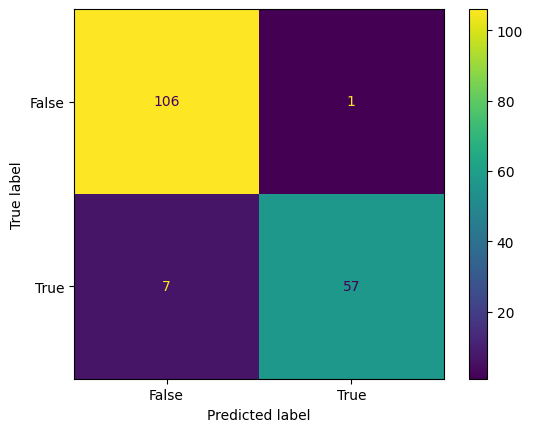

In [29]:
#Creating the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(Y_testing_data,Y_LR_predicted)

#Displaying the Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Accuracy, Recall, Precision and F-Score for Regression Model

In [30]:
#Accuracy 
print("Accuracy for Regression Model: ",metrics.accuracy_score(Y_testing_data,Y_LR_predicted))

Accuracy for Regression Model:  0.9532163742690059


In [31]:
#Recall
print("Recall value for Regression Model: ",metrics.recall_score(Y_testing_data,Y_LR_predicted))

Recall value for Regression Model:  0.890625


In [32]:
#Precision
print("Precision value for Regression Model: ",metrics.precision_score(Y_testing_data,Y_LR_predicted))

Precision value for Regression Model:  0.9827586206896551


In [33]:
#F-Score
print("F-Score for Regression Model: ",metrics.f1_score(Y_testing_data,Y_LR_predicted))

F-Score for Regression Model:  0.9344262295081966


### Receiver Operating Characterstic Curve for Regression Model

Text(0.5, 1.0, 'Receiver operating characteristic for Regression')

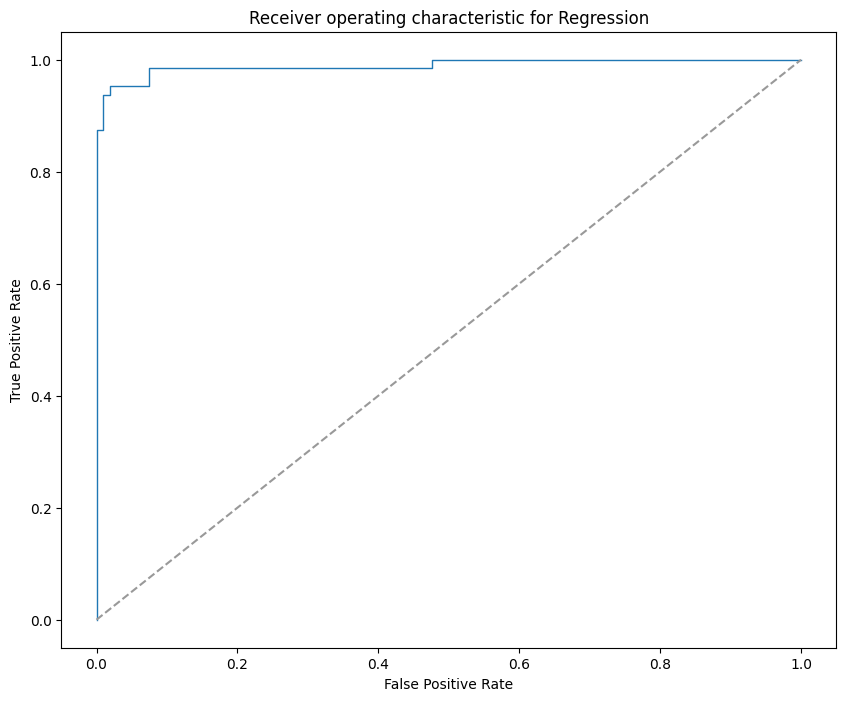

In [34]:
# Plotting the ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
probas_ = logreg.predict_proba(X_testing_data)
fpr, tpr, thresholds = roc_curve(Y_testing_data, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Regression')

## 2. K-Nearest Neighbour

In [35]:
#Importing the K-Nearest Neighbour Function with K=7
knn = KNeighborsClassifier(n_neighbors=7)

#traing the KNN Model
knn.fit(X_training_data,Y_training_data)

KNeighborsClassifier(n_neighbors=7)

In [36]:
#Predicting the corresponding output values fo Testing Input Data
Y_KNN_predicted = knn.predict(X_testing_data)

### Confusion Matrix for K-Nearest Neighbour Model

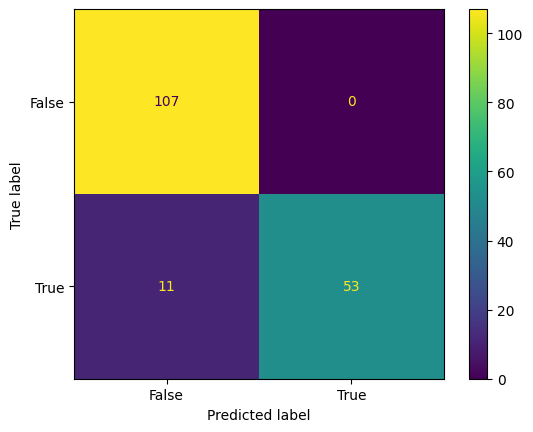

In [37]:
#Creating the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(Y_testing_data,Y_KNN_predicted)

#Displaying the Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Accuracy, Recall, Precision and F-Score for K-Nearest Neighbour Model

In [38]:
#Accuracy 
print("Accuracy for KNN Model: ",metrics.accuracy_score(Y_testing_data,Y_KNN_predicted))

Accuracy for KNN Model:  0.935672514619883


In [39]:
#Recall
print("Recall value for KNN Model: ",metrics.recall_score(Y_testing_data,Y_KNN_predicted))

Recall value for KNN Model:  0.828125


In [40]:
#Precision
print("Precision value for KNN Model: ",metrics.precision_score(Y_testing_data,Y_KNN_predicted))

Precision value for KNN Model:  1.0


In [41]:
#F-Score
print("F-Score for KNN Model: ",metrics.f1_score(Y_testing_data,Y_KNN_predicted))

F-Score for KNN Model:  0.905982905982906


### Receiver Operating Characterstic Curve for K-Nearest Neighbour Model

Text(0.5, 1.0, 'Receiver operating characteristic for KNN')

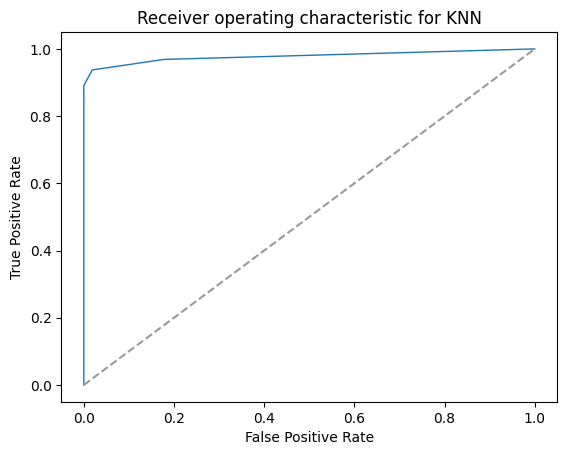

In [42]:
# Plotting the ROC Curve
import matplotlib.pyplot as plt
probas_ = knn.predict_proba(X_testing_data)
fpr, tpr, thresholds = roc_curve(Y_testing_data, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for KNN')

## 3. Artificial Neural Network

In [43]:
#Importing the Neural Network Function
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
ann.fit(X_training_data,Y_training_data,batch_size=64,epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 9ms/step - loss: 0.7011 - accuracy: 0.6256
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6872 - accuracy: 0.6281
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6738 - accuracy: 0.6281
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6609 - accuracy: 0.6281
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6484 - accuracy: 0.6281
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6281
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.6281
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6091 - accuracy: 0.6281
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5960 - accuracy: 0.6281
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.6281
Epoch 11/100
7/7 [==========

In [44]:
#Predicting the corresponding output values for Testing Input data
Y_ANN_predicted = ann.predict(X_testing_data)

6/6 [==============================] - 0s 3ms/step


In [45]:
#Converting float type values into binary 
Y_ANN_predicted = (Y_ANN_predicted>0.5)

### Confusion Matrix for Artificial Neural Network Model

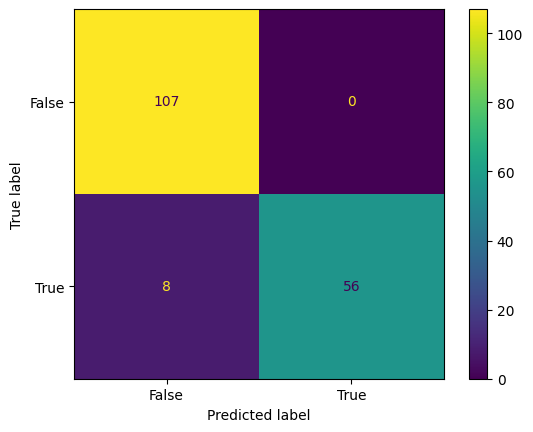

In [46]:
#Creating the Confusion Matrix
confusion_matrix = metrics.confusion_matrix(Y_testing_data,Y_ANN_predicted)

#Displaying the Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

### Accuracy, Recall, Precision and F-Score for Artificial Neural Network Model

In [47]:
#Accuracy 
print("Accuracy for ANN Model: ",metrics.accuracy_score(Y_testing_data,Y_ANN_predicted))

Accuracy for ANN Model:  0.9532163742690059


In [48]:
#Recall
print("Recall value for ANN Model: ",metrics.recall_score(Y_testing_data,Y_ANN_predicted))

Recall value for ANN Model:  0.875


In [49]:
#Precision
print("Precision value for ANN Model: ",metrics.precision_score(Y_testing_data,Y_ANN_predicted))

Precision value for ANN Model:  1.0


In [50]:
#F-Score
print("F-Score for ANN Model: ",metrics.f1_score(Y_testing_data,Y_ANN_predicted))

F-Score for ANN Model:  0.9333333333333333


### Receiver Operating Characterstic Curve for Artificial Neural Network Model

6/6 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Receiver operating characteristic for ANN')

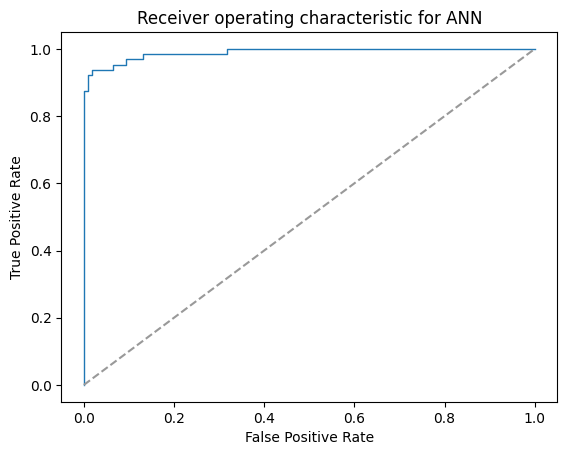

In [53]:
# Plotting the ROC Curve
import matplotlib.pyplot as plt
probas_ = ann.predict(X_testing_data)
fpr, tpr, thresholds = roc_curve(Y_testing_data, probas_[:,])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for ANN')